In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
import pickle
from google.colab import drive
drive.mount('content/')
import os


Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [34]:
base = pd.read_csv("/content/content/MyDrive/data/BlackFriday.csv")


# Les premiers 5 ligne de la dataset

In [35]:
base.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Toute les lignes du dataset

In [36]:
base

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


## On prend les 10000 premiers ligne pour faire la visualisattion

In [37]:
df=base.iloc[:10000,:]

In [46]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1001530,P00151742,M,26-35,4,A,1,1,8,15.0,16.0,7967
9996,1001530,P00119742,M,26-35,4,A,1,1,5,8.0,12.0,8590
9997,1001530,P00178842,M,26-35,4,A,1,1,2,4.0,9.0,13147
9998,1001530,P00124842,M,26-35,4,A,1,1,11,NaN,NaN,5975


## quelques détails statistiques de base

In [54]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6757.000000,2997.000000,10000.000000
mean,1.000791e+06,8.433700,0.405300,5.292800,9.796359,12.811144,9152.487700
std,4.402229e+02,6.660333,0.490975,3.660739,5.055550,4.057049,4881.543001
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1.000403e+06,3.000000,0.000000,2.000000,5.000000,9.000000,5831.750000
50%,1.000817e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8021.500000
75%,1.001172e+06,15.000000,1.000000,8.000000,14.000000,16.000000,11922.250000
max,1.001530e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


## Le presence de chaque genre 

In [38]:
base['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

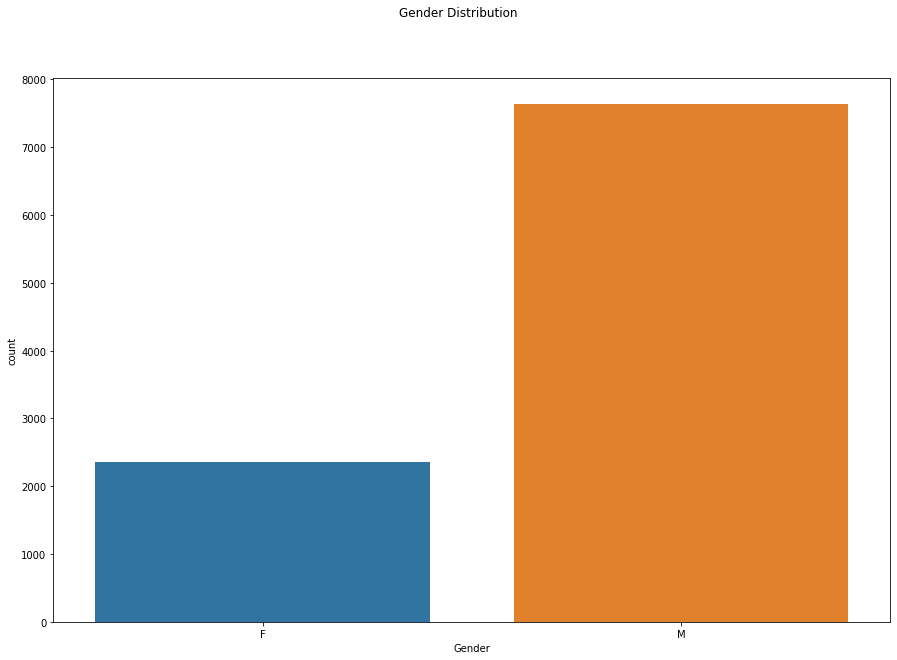

In [57]:
plt.figure(figsize=(15,10))
plt.suptitle('Gender Distribution')
sns.countplot(x=df.Gender)

## La presence de chaque intervalle d'age

In [40]:

base['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

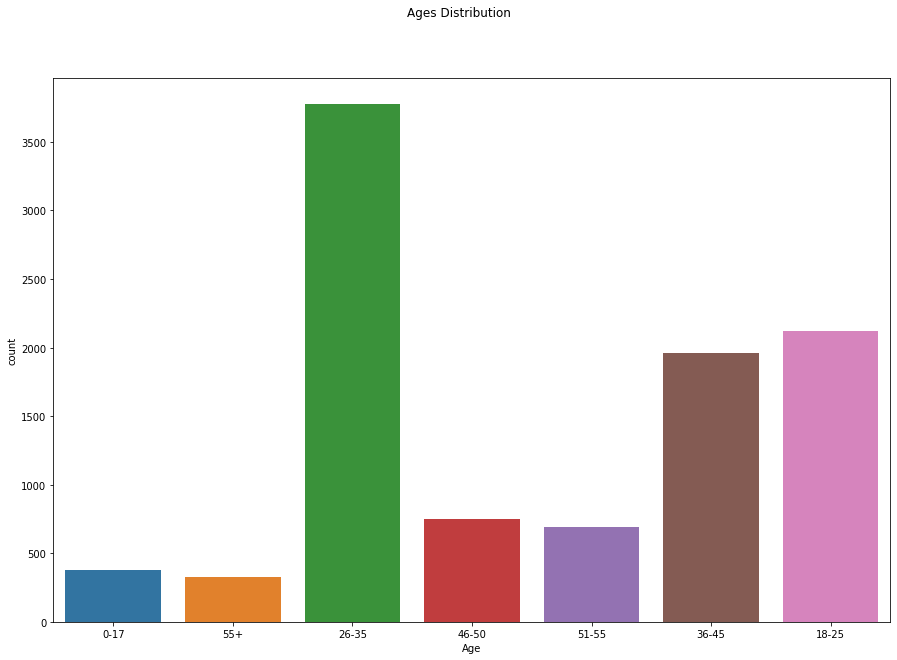

In [58]:
plt.figure(figsize=(15,10))
plt.suptitle('Ages Distribution')
sns.countplot(x=df.Age)

# La distribution de l'occupation

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


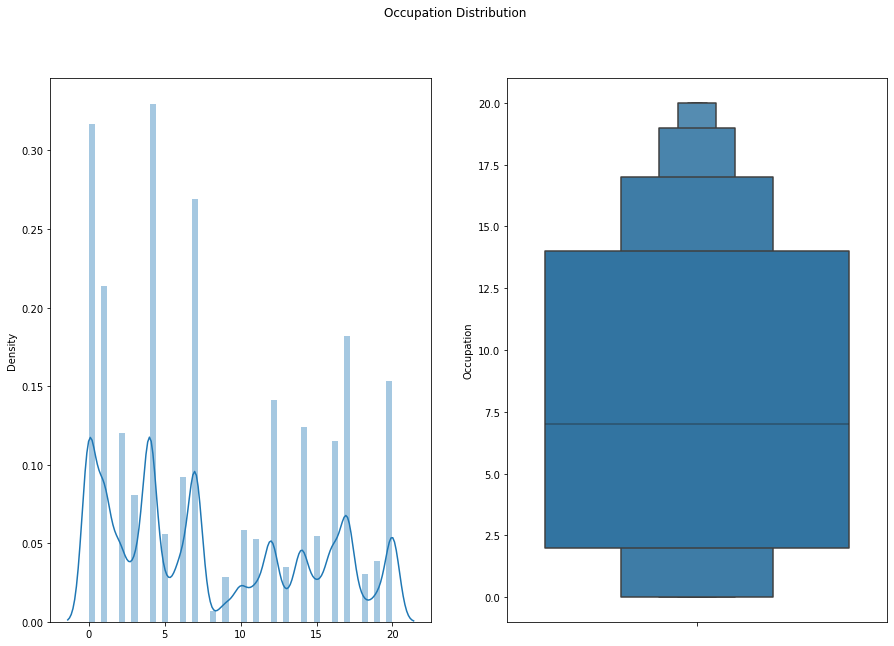

In [42]:
plt.figure(figsize=(15,10))
plt.suptitle('Occupation Distribution')

plt.subplot(1,2,1)
sns.distplot(x=base.Occupation)

plt.subplot(1,2,2)
sns.boxenplot(y=base.Occupation)

## La répartition des achats (purchase) seul et avec l'âge

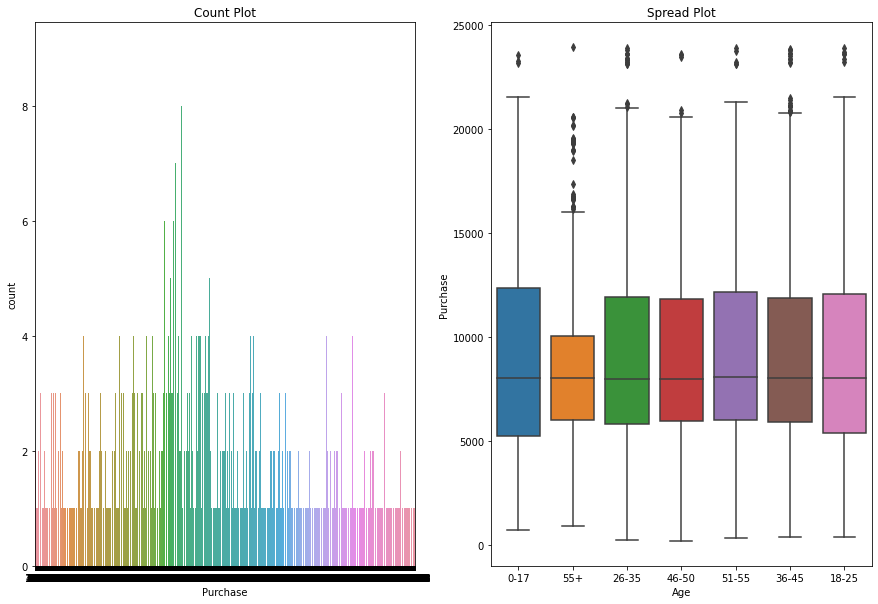

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(x=df.Purchase)
plt.title('Count Plot')
plt.subplot(1,2,2)
sns.boxplot(x=df.Age,y=df.Purchase)
plt.title('Spread Plot')
plt.show()

# **Partie ACP**


In [59]:
base = df

In [61]:
n = 1000 #Variable utiliser pour définire le nombre d'individuts
base2 = base.head(n) #Echantillon de n individuts
#Supprimer les colonnes 
base3 = base2.drop(labels=['Product_ID', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'User_ID'], axis = 1)
var = base2['Product_ID'] #Stocké la colonne Product_ID dans une variable


In [62]:
#Remplacer le F par 1 et le M par 0    
for i in range(0,n) : 
    if base3.Gender[i] == "F":
        base3.Gender[i] = "1"
    if base3.Gender[i] == "M":
        base3.Gender[i] = "0"

<ipython-input-62-9ca37273481a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base3.Gender[i] = "1"
<ipython-input-62-9ca37273481a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base3.Gender[i] = "0"


In [63]:
print(base3)

    Gender  Marital_Status  Purchase
0        1               0      8370
1        1               0     15200
2        1               0      1422
3        1               0      1057
4        0               0      7969
..     ...             ...       ...
995      0               1     19696
996      0               1     15745
997      1               1     16018
998      0               0     14070
999      0               1       759

[1000 rows x 3 columns]


In [64]:
#Dimension
print(base3.shape)
#Nombre d'individus
n = base3.shape[0]
#Nombre de variable
p = base3.shape[1]

(1000, 3)


In [65]:
import sklearn
from sklearn.preprocessing import StandardScaler
#Instanciation de la classe 
sc = StandardScaler()
#XS matrice centrée réduite 
XS = sc.fit_transform(base3)
print("Matrice centrée réduite : \n", XS)

Matrice centrée réduite : 
 [[ 1.55713119 -1.01816496 -0.23690548]
 [ 1.55713119 -1.01816496  1.09761696]
 [ 1.55713119 -1.01816496 -1.59448409]
 ...
 [ 1.55713119  0.98215912  1.25744702]
 [-0.64220665 -1.01816496  0.87682481]
 [-0.64220665  0.98215912 -1.7240285 ]]


In [66]:
#Vérification : matrice de dimension n * p
print("La matrice est de dimension : ", XS.shape)
#Vérification : somme colonnes = 0
print("La somme des colonnes : \n", sum(XS))
#Vérification : variance colonnes = 1
print("La variance des colonnes : \n",np.var(XS, axis=0))

La matrice est de dimension :  (1000, 3)
La somme des colonnes : 
 [-4.99600361e-14 -4.46198634e-13 -8.83737528e-14]
La variance des colonnes : 
 [1. 1. 1.]


In [67]:
#Deuxième étape matrice de corrélation
XSt = np.transpose(XS)
corr = (1/n)*np.matmul(XSt,XS)
print("Matrice de corrélation : \n", corr)

Matrice de corrélation : 
 [[ 1.00000000e+00  1.63657250e-03 -5.57285881e-02]
 [ 1.63657250e-03  1.00000000e+00  1.22059996e-04]
 [-5.57285881e-02  1.22059996e-04  1.00000000e+00]]


In [68]:
#Vérification matrice d'ordre p
print("La matrice de corrélation est d'ordre : ", corr.shape)
#Vérification matrice symétrique 
#Fonction supplémentaire 
def check_symmetric(a, tol=1e-8):
    return not False in (np.abs(a-a.T) < tol)
print("La matrice de corrélation est symétrique : ", check_symmetric(corr))
#Vérification Diagonal de 1
print("La diagonale est égale à : \n", np.diag(corr))
#Vérification coefficients compris -1 et 1
print("Les coefficients sont différent de 1 et -1 : ", (corr > 1).all() and (corr < -1).all())

La matrice de corrélation est d'ordre :  (3, 3)
La matrice de corrélation est symétrique :  True
La diagonale est égale à : 
 [1. 1. 1.]
Les coefficients sont différent de 1 et -1 :  False


In [69]:
#Troisieme étape composante principale
from sklearn.decomposition import PCA
#instanciation
acp = PCA()
#calculs des coordonnées factorielles
coord = acp.fit_transform(XS)
print("Composantes principales : \n", coord)
#nombre de composantes calculées
print("Nombre de composante K : ", acp.n_components_)

Composantes principales : 
 [[-1.24898156  1.0212747   0.95628692]
 [-0.30570808  0.98210135  1.89949991]
 [-2.2085517   1.06112483 -0.00322169]
 ...
 [-0.23116424 -1.0220476   1.96785388]
 [ 1.0934435   0.99338918  0.18833553]
 [-0.78333197 -0.92972314 -1.69450468]]
Nombre de composante K :  3


In [70]:
#Vérification dimension n * p
print("Matrice de dimension n x p : ",coord.shape)
#Vérification somme colonnes = 0
print('Matrice centrée : somme colonnes = 0 \n', coord.sum(axis = 0))

Matrice de dimension n x p :  (1000, 3)
Matrice centrée : somme colonnes = 0 
 [-8.52651283e-14  6.39488462e-14 -1.03028697e-13]


In [71]:
#Quatrieme étape valeur/vecteur propres
#Les valeus propres
vp = acp.explained_variance_
print("Les valeurs propres : \n", vp)
#Qualité de représentation
print("\nLa qualité de représentation : \n", (acp.explained_variance_ratio_*100), "%")
#Les vecteur propres
print("\nMatrice de changement de base : \n",acp.components_)

Les valeurs propres : 
 [1.05680597 1.00100817 0.94518886]

La qualité de représentation : 
 [35.19163884 33.33357209 31.47478906] %

Matrice de changement de base : 
 [[-0.7071278  -0.01921089  0.70682474]
 [-0.00218554 -0.99956669 -0.02935383]
 [ 0.70708238 -0.0223017   0.70677941]]


In [72]:
#Qualité de représentation de chaque individu
#Contribution des individus dans l'inertie totale
d = np.sum(XS**2, axis = 1)
cos = coord**2
for j in range(p):
    cos[:,j] = cos[:,j]/d
print(pd.DataFrame({'id' : base3.index, 'Qlt axe 1' : cos[:,0], 'Qlt axe 2' : cos[:,1], 'Qlt axe 3' : cos[:,2]}))
#print(np.sum(cos, axis=1))

      id  Qlt axe 1  Qlt axe 2  Qlt axe 3
0      0   0.443491   0.296523   0.259986
1      1   0.020029   0.206709   0.773261
2      2   0.812450   0.187549   0.000002
3      3   0.818270   0.181269   0.000461
4      4   0.040637   0.682973   0.276389
..   ...        ...        ...        ...
995  995   0.635410   0.204115   0.160474
996  996   0.585328   0.364917   0.049755
997  997   0.010751   0.210158   0.779092
998  998   0.539074   0.444933   0.015993
999  999   0.141081   0.198739   0.660180

[1000 rows x 4 columns]


In [73]:
#Cinquième étape matrice des saturations
#racine carrée des valeurs propres 
vp2 = np.sqrt(vp)
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(acp.n_components_):
    corvar[:,k] = acp.components_[k,:] * vp2[k]
print("Matrice de saturation \n", corvar)

Matrice de saturation 
 [[-0.72693494 -0.00218664  0.68743132]
 [-0.019749   -1.00007043 -0.0216819 ]
 [ 0.72662339 -0.02936863  0.68713677]]


In [74]:
#Vérification carrée d'ordre p
print(corvar.shape)

(3, 3)


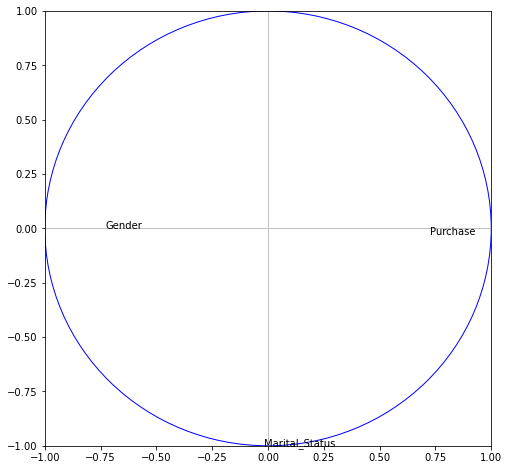

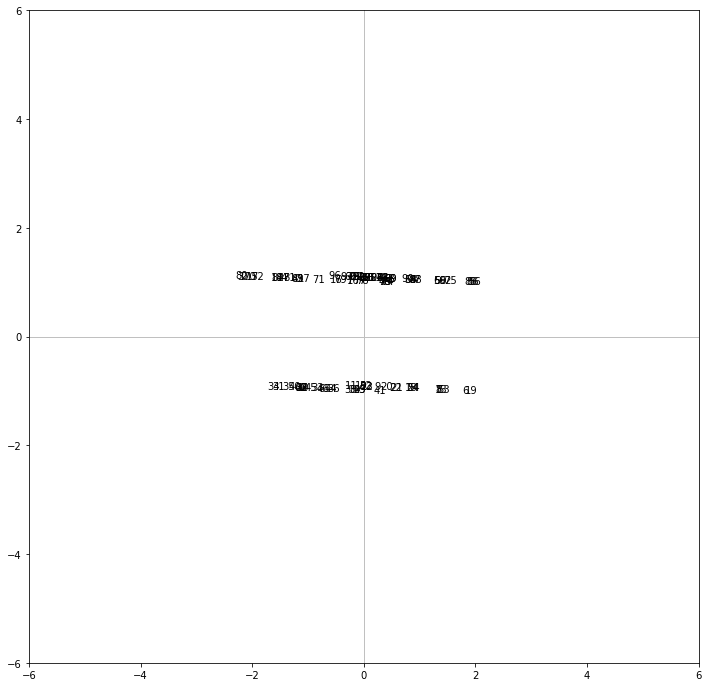

In [75]:
#Sixième étape représentation graphiques
#Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(base3.columns[j],(corvar[j,0],corvar[j,1]))
    
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.show
#Représentation des individuts dans le plan 
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(100):
    plt.annotate(var.index[i], (coord[i,0],coord[i,1]))

plt.plot([-6,6],[0,0], color='silver', linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.show()

In [76]:
base3.head(70)

,Gender,Marital_Status,Purchase
0,1,0,8370
1,1,0,15200
2,1,0,1422
3,1,0,1057
4,0,0,7969
...,...,...,...
65,1,1,11755
66,1,1,8702
67,0,0,15872
68,0,0,8609
